In [25]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
%matplotlib inline

In [71]:
cap = cv2.VideoCapture('sunset.mp4')

In [35]:
status = True
status, img_bgr = cap.read()
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
sums = []
while status:
    for i in range(skip):
        status = cap.grab()
        if not status:
            break
    img_old = img_gray
    status, img_bgr = cap.read()
    if not status:
        break
    img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
    sums.append(np.abs((img_gray.astype('float32') - img_old.astype('float32'))).sum())

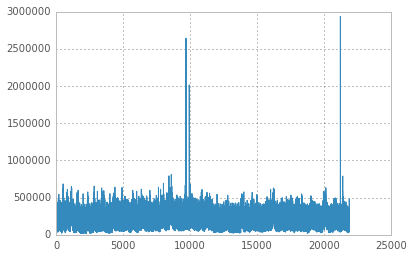

In [56]:

plt.plot(sums)


In [57]:
np.argsort(sums)

array([ 1967,  2557,  1942, ...,  9682, 21209, 21210])

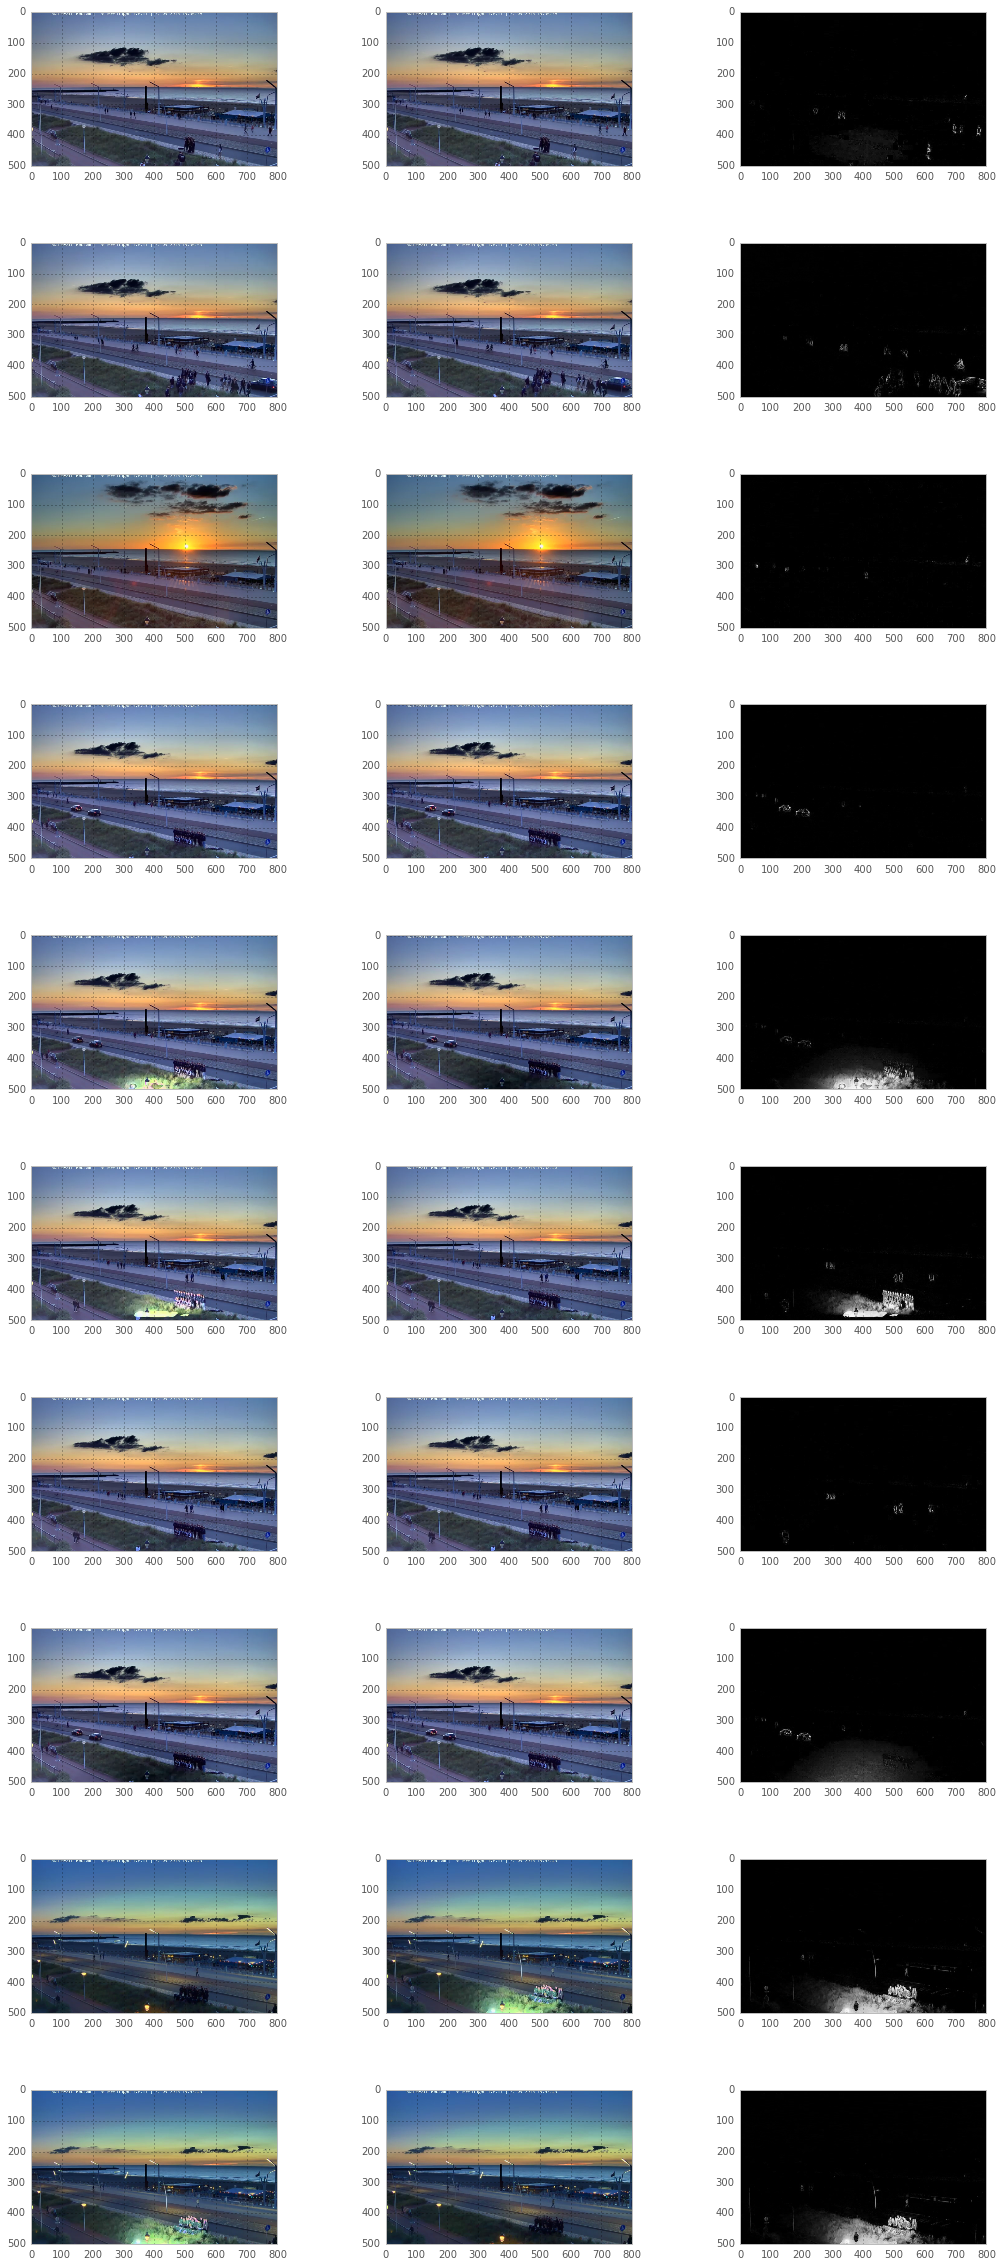

In [90]:
n = 10
fig, axes = plt.subplots(n, 3, figsize=(6*3, n*4))
for i, idx in enumerate(np.argsort(sums)[-n:]):
    cap.set(cv2.CAP_PROP_POS_FRAMES, (idx+1)*(skip+1))
    status, img0 = cap.read()
    img0 = cv2.cvtColor(img0, cv2.COLOR_BGR2RGB)
    cap.grab()
    status, img1 = cap.read()
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
    axes[i, 0].imshow(img0)
    axes[i, 1].imshow(img1)
    axes[i, 2].imshow(np.abs(img0.mean(axis=-1) - img1.mean(axis=-1)), cmap='Greys_r')


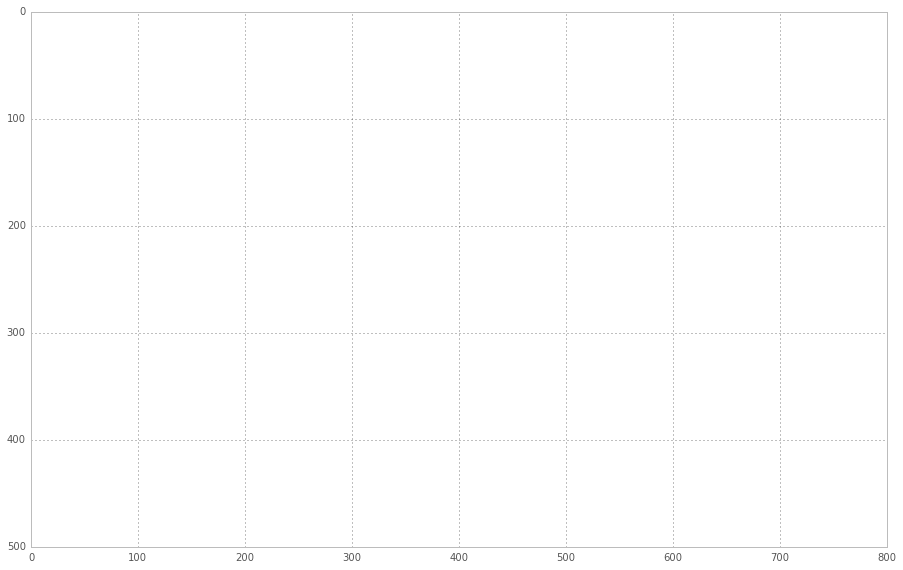

In [247]:
bg = cv2.createBackgroundSubtractorMOG2(history=100)
cap = cv2.VideoCapture('sunset.mp4')
status = True
import matplotlib.colors
N = matplotlib.colors.Normalize(0, 60, clip=True)
cap.set(cv2.CAP_PROP_POS_FRAMES, 1000)
fig, ax = plt.subplots(figsize=(13,8))
fig.tight_layout()
# fill the history
for i in range(100):
    status, img_bgr = cap.read()
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    bg.apply(img_rgb)
for i in range(1000):
    status, img_bgr = cap.read()
    if not status:
        break
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    img_rgba = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA)
    bg.apply(img_rgb)
    alpha = np.abs(img_rgb.mean(axis=-1) - bg.getBackgroundImage().mean(axis=-1))
    img_rgba[:,:,-1] = 100 + (N(alpha)*155).astype('uint8')
    img_rgba[:,:250,-1] = 255
    img_rgba[:,-50:,-1] = 255
    img_rgba[:300,:,-1] = 255
    img_rgba[-50:,:,-1] = 255
    ax.imshow(img_rgba)
    x = np.array([250, 250, 750, 750]) + [-3, -3, 3, 3]
    y = np.array([300, 450, 450, 300]) + [-4, 2, 2, -4]
    ax.fill(x, y, facecolor='none', edgecolor='green', linewidth=4, alpha=0.3)
    ax.set_axis_off()
    ax.set_xlim(0, img_rgba.shape[1])
    ax.set_ylim(img_rgba.shape[0], 0)    
    fig.savefig('img_%04d.png' % (i,))
    ax.clear()

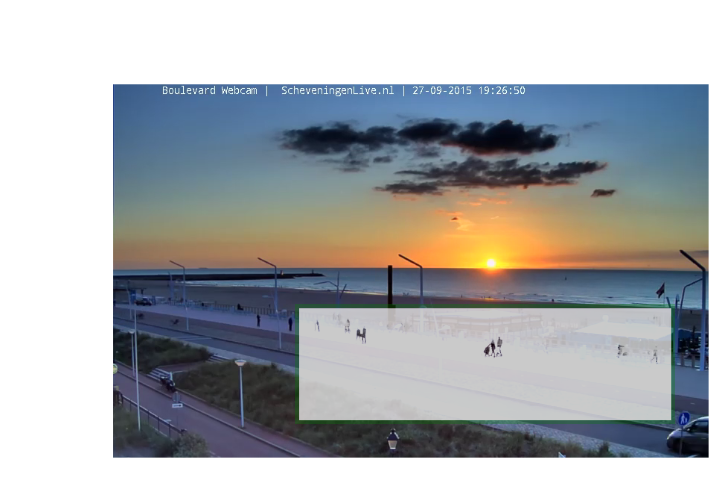

In [246]:
def plot(a, b):
    img_rgba = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGBA)
    alpha = np.abs(img_rgb.mean(axis=-1) - bg.getBackgroundImage().mean(axis=-1))
    N = matplotlib.colors.Normalize(a, b, clip=True)
    img_rgba[:,:,-1] = 75 + (N(alpha)*180).astype('uint8')
    img_rgba[:,:250,-1] = 255
    img_rgba[:,-50:,-1] = 255
    img_rgba[:300,:,-1] = 255
    img_rgba[-50:,:,-1] = 255
    plt.figure(figsize=(13,8))
    plt.imshow(img_rgba)
    x = np.array([250, 250, 750, 750]) + [-3, -3, 3, 3]
    y = np.array([300, 450, 450, 300]) + [-4, 2, 2, -4]
    plt.fill(x, y, facecolor='none', edgecolor='green', linewidth=4, alpha=0.3)
    plt.axis('off')

from IPython.html.widgets import interactive
interactive(plot, a=(0,50,3), b=(0,255,10))

In [109]:
np.abs(img_rgb.mean(axis=-1) - bg.getBackgroundImage().mean(axis=-1)).max()

187.0

In [133]:
img_hsv[:,:,2].max()

165